In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [128]:
employeeAttritionPrediction = pd.read_csv(r"C:\Users\subha\Documents\employeeAttritionPrediction_output.csv")


In [129]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion',
 'predicted_conversion']

In [130]:
employeeAttritionPrediction.rename(columns={"attrition": "actual_conversion"}, inplace=True)

In [131]:
employeeAttritionPrediction['actual_conversion'].value_counts()

actual_conversion
0    403
1    398
Name: count, dtype: int64

In [132]:

employeeAttritionPrediction.head()

,employee_id,employee_age,employee_gender,department,job_role,monthly_income,years_at_company,years_in_current_role,actual_conversion,predicted_conversion
0,2231,NaN,NaN,NaN,NaN,142144,NaN,NaN,1,1
1,669,NaN,NaN,NaN,NaN,127383,NaN,NaN,1,1
2,3619,19.0,0.0,3.0,2.0,31343,13.0,4.0,0,1
3,2364,NaN,NaN,NaN,NaN,85124,NaN,NaN,0,1
4,143,NaN,-1.0,-1.0,-1.0,89895,NaN,NaN,0,1


In [133]:
# Check for missing values
print("Missing values in the dataset:")
print(employeeAttritionPrediction.isnull().sum())

Missing values in the dataset:
employee_id                0
employee_age             674
employee_gender          624
department               624
job_role                 624
monthly_income             0
years_at_company         674
years_in_current_role    674
actual_conversion          0
predicted_conversion       0
dtype: int64


In [134]:
# Display basic statistics of the dataset
print("Basic statistics of the dataset:")
print(employeeAttritionPrediction.describe())

Basic statistics of the dataset:
       employee_id  employee_age  employee_gender  department    job_role  \
count    801.00000    127.000000       177.000000  177.000000  177.000000   
mean    1971.66417     40.149606         0.096045    1.214689    0.813559   
std     1180.68952     14.507294         0.809627    1.888725    1.486392   
min        2.00000     18.000000        -1.000000   -1.000000   -1.000000   
25%      928.00000     26.500000        -1.000000   -1.000000   -1.000000   
50%     1975.00000     41.000000         0.000000    1.000000    1.000000   
75%     3014.00000     52.500000         1.000000    3.000000    2.000000   
max     4002.00000     65.000000         1.000000    4.000000    3.000000   

       monthly_income  years_at_company  years_in_current_role  \
count      801.000000        127.000000             127.000000   
mean     90435.353308         10.952756               5.267717   
std      34484.586774          5.570413               2.685791   
min      

In [135]:
# Check for class imbalance
print("Conversion rate in the dataset:")
print(employeeAttritionPrediction['actual_conversion'].value_counts(normalize=True))


Conversion rate in the dataset:
actual_conversion
0    0.503121
1    0.496879
Name: proportion, dtype: float64


In [136]:
# Display data types of each column
print("Data types of each column:")
print(employeeAttritionPrediction.dtypes)

Data types of each column:
employee_id                int64
employee_age             float64
employee_gender          float64
department               float64
job_role                 float64
monthly_income             int64
years_at_company         float64
years_in_current_role    float64
actual_conversion          int64
predicted_conversion       int64
dtype: object


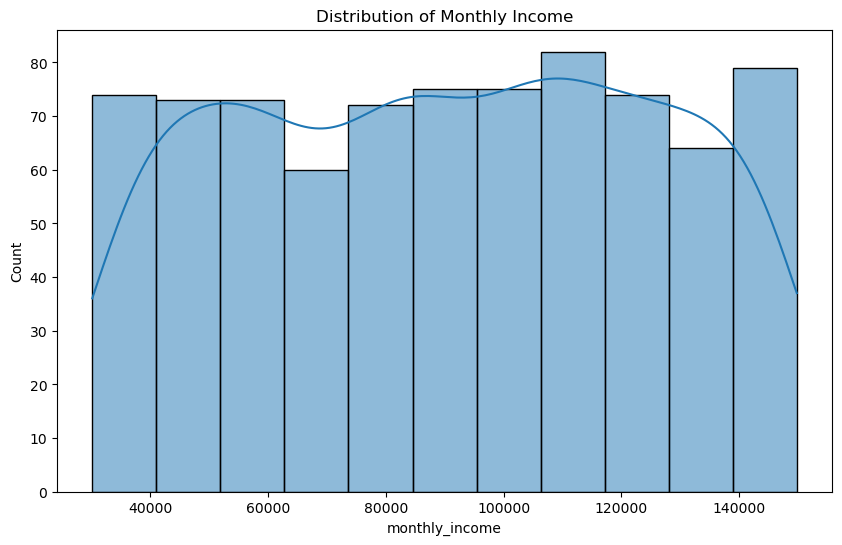

In [137]:
# Plot the distribution of numeric features
plt.figure(figsize=(10, 6))
sns.histplot(employeeAttritionPrediction['monthly_income'], kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

In [138]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion',
 'predicted_conversion']

In [139]:
# Display data types of each column
print("Data types of each column:")
print(employeeAttritionPrediction.dtypes)

Data types of each column:
employee_id                int64
employee_age             float64
employee_gender          float64
department               float64
job_role                 float64
monthly_income             int64
years_at_company         float64
years_in_current_role    float64
actual_conversion          int64
predicted_conversion       int64
dtype: object


In [140]:
# Encode categorical variables
employeeAttritionPrediction['employee_gender'] = employeeAttritionPrediction['employee_gender'].astype('category').cat.codes
employeeAttritionPrediction['department'] = employeeAttritionPrediction['department'].astype('category').cat.codes
employeeAttritionPrediction['job_role'] = employeeAttritionPrediction['job_role'].astype('category').cat.codes


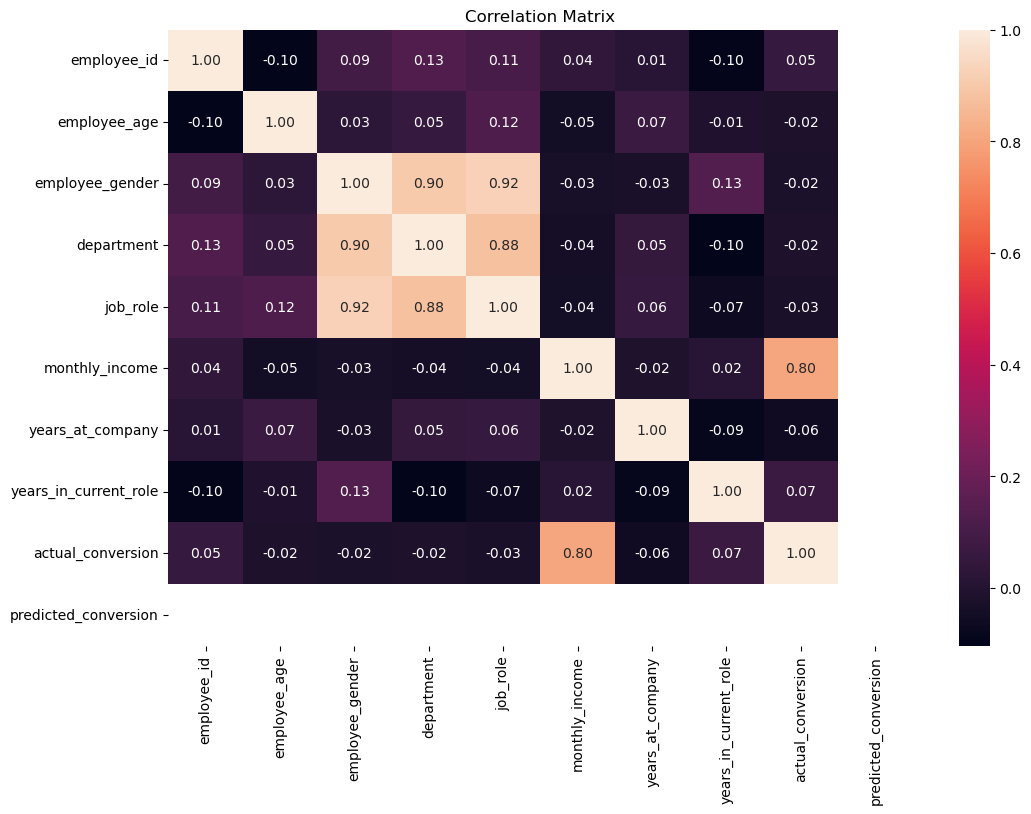

In [141]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(employeeAttritionPrediction.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [142]:
# Summary statistics by conversion
conversion_summary = employeeAttritionPrediction.groupby('actual_conversion').mean()
print("Summary statistics by conversion:")
print(conversion_summary)

Summary statistics by conversion:
                   employee_id  employee_age  employee_gender  department  \
actual_conversion                                                           
0                  1907.806452     40.406250        -0.513648   -0.258065   
1                  2036.324121     39.888889        -0.560302   -0.321608   

                   job_role  monthly_income  years_at_company  \
actual_conversion                                               
0                 -0.342432     62955.73201         11.265625   
1                 -0.414573    118260.19598         10.634921   

                   years_in_current_role  predicted_conversion  
actual_conversion                                               
0                               5.093750                   1.0  
1                               5.444444                   1.0  


In [143]:
# Extract features and target variable
X = employeeAttritionPrediction[['monthly_income']]
y = employeeAttritionPrediction['actual_conversion']

In [144]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

In [145]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0 81]
 [ 0 80]]


In [146]:
print("Classification Report:")
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.50      1.00      0.66        80

    accuracy                           0.50       161
   macro avg       0.25      0.50      0.33       161
weighted avg       0.25      0.50      0.33       161



C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\skle

In [147]:
print("Accuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Accuracy Score:
0.4968944099378882


In [148]:
# Save the predictions and evaluation results to a CSV file
predictions = pd.DataFrame({
    'employee_id': X_test.index,
    'actual': y_test,
    'predicted': y_pred
})

In [149]:
fin_df = pd.DataFrame()

In [150]:
fin_df['monthly_income'] = X_test

In [151]:
fin_df['actual_conversion'] = y_test

In [152]:
fin_df['predicted_conversion'] = y_pred

In [153]:
fin_df['employee_id'] = fin_df.index + 1

In [154]:
cols = ['employee_id', 'monthly_income', 'actual_conversion','predicted_conversion']
fin_df = fin_df[cols]

In [155]:
fin_df.head()

,employee_id,monthly_income,actual_conversion,predicted_conversion
8,9,108406,1,1
253,254,105140,1,1
85,86,51059,0,1
406,407,98671,1,1
14,15,69471,0,1


In [156]:
fin_df['employee_id'].count()

161

In [157]:
round((employeeAttritionPrediction['actual_conversion'].value_counts().sum())*0.2,0)

160.0

In [158]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion',
 'predicted_conversion']

In [159]:
merged_df = pd.merge(fin_df[['employee_id', 'monthly_income', 'actual_conversion','predicted_conversion']], 
                     
                     employeeAttritionPrediction[['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'years_at_company',
 'years_in_current_role']], 
                     on="employee_id", how="left")

In [160]:
cols = ['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion',
         'predicted_conversion']

merged_df = merged_df[cols]

In [161]:
merged_df.head(5)

,employee_id,employee_age,employee_gender,department,job_role,monthly_income,years_at_company,years_in_current_role,actual_conversion,predicted_conversion
0,9,NaN,NaN,NaN,NaN,108406,NaN,NaN,1,1
1,254,NaN,-1.0,-1.0,-1.0,105140,NaN,NaN,1,1
2,86,NaN,-1.0,-1.0,-1.0,51059,NaN,NaN,0,1
3,407,NaN,NaN,NaN,NaN,98671,NaN,NaN,1,1
4,15,NaN,-1.0,-1.0,-1.0,69471,NaN,NaN,0,1


In [162]:
merged_df.to_csv('employeeAttritionPrediction_output.csv', index=False)

In [163]:
# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Classification Report:")
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Save confusion matrix, classification report, and accuracy score to the CSV file
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual_0', 'Actual_1'], columns=['Predicted_0', 'Predicted_1'])
class_report_df = pd.DataFrame(class_report).transpose()
evaluation_results = pd.DataFrame({'Metric': ['Accuracy'], 'Score': [accuracy]})

Confusion Matrix:
[[ 0 81]
 [ 0 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.50      1.00      0.66        80

    accuracy                           0.50       161
   macro avg       0.25      0.50      0.33       161
weighted avg       0.25      0.50      0.33       161

Accuracy Score:
0.4968944099378882


C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subha\.vscode\cli\Lib\site-packages\skle

In [164]:
conf_matrix_df

,Predicted_0,Predicted_1
Actual_0,0,81
Actual_1,0,80


In [165]:
class_report_df

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,81.000000
1,0.496894,1.000000,0.663900,80.000000
accuracy,0.496894,0.496894,0.496894,0.496894
macro avg,0.248447,0.500000,0.331950,161.000000
weighted avg,0.246904,0.496894,0.329888,161.000000


In [166]:
evaluation_results

,Metric,Score
0,Accuracy,0.496894


In [167]:
# Write to Excel
with pd.ExcelWriter('model_evaluation_results_employeeAttritionPrediction.xlsx') as writer:
    predictions.to_excel(writer, sheet_name='Predictions', index=False)
    conf_matrix_df.to_excel(writer, sheet_name='Confusion_Matrix')
    class_report_df.to_excel(writer, sheet_name='Classification_Report')
    evaluation_results.to_excel(writer, sheet_name='Accuracy_Score')

In [168]:
print("Employee Attrition Prediction Model has been built successfully.")

Employee Attrition Prediction Model has been built successfully.
